In [37]:
!pip install pandas numpy
!pip install deep-translator

In [38]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator

In [39]:
# Change the content if you are running out of collab in accordance with your environment
file = "/content/Sales.csv"

#\s{2,} → 2 or more spaces and \t+ → one or more tabs
#Uses the Python parsing engine (more flexible with regex separators like \s{2,}), instead of the default C engine.
#header=None Tells Pandas not to treat any row as column names, so it assigns default column names as 0, 1, 2, etc.
data = pd.read_csv(file, on_bad_lines='skip', sep=r'\s{2,}|\t+',
                  engine='python', skiprows=1, header=None)

data.columns = ['Code', 'Description', 'Amount_Sold', 'Unit_Price', 'Total_Cost', 'Buying',
               'COGS', 'Margin%', 'MKP%', 'Total_Sale']
data.head()


,Code,Description,Amount_Sold,Unit_Price,Total_Cost,Buying,COGS,Margin%,MKP%,Total_Sale
0,024513,ABACATE AGRANEL KG,"267,418","8,39","1.346,60","1.346,60","1.346,60","40,01","66,68","2.244,54"
1,025049,ABACAXI PECA,"986,000","4,91","3.674,41","3.674,41","3.674,41","24,05","31,67","4.837,92"
2,072665,ABACAXI PROMOCAO PECA,"9,000","0,99","31,50","31,50","31,50","-253,54","-71,71","8,91"
3,024541,ABOBORA CABOTIA AGRANEL KG,"1.474,745","1,66","1.746,97","1.746,97","1.746,96","28,46","39,79","2.442,07"
4,063614,ABOBORA CABOTIA EMBALADO KG,"502,739","2,46","601,59","601,59","601,59","51,29","105,32","1.235,17"


In [40]:
# Translating description
import os

# Path where the translated file will be saved
file_path = '/content/translated_data.csv'

# Check if translated file already exists
# Change the content if you are running out of collab in accordance with your environment
if os.path.exists(file_path):
    print("Translated file found. Loading it...")
    data = pd.read_csv(file_path)
else:
    print("File not found. Translating now...")

    # Define a safe translation function
    def safe_translate(text):
       try:
           if isinstance(text, str):
               return GoogleTranslator(source='pt', target='en').translate(text)
       except Exception:
               return text

    # Apply the translation
    data['text_en'] = data['Description'].apply(safe_translate)

    # Save the result to avoid redoing it later
    data.to_csv(file_path, index=False)
    print("Translation done and file saved to Drive.")

# Show a preview
data.head()

Translated file found. Loading it...


,Code,Description,Amount_Sold,Unit_Price,Total_Cost,Buying,COGS,Margin%,MKP%,Total_Sale,text_en
0,024513,ABACATE AGRANEL KG,267.418,8.39,1346.60,1346.60,1346.60,40.01,66.68,2244.54,Avocado Agranel Kg
1,025049,ABACAXI PECA,986.000,4.91,3674.41,3674.41,3674.41,24.05,31.67,4837.92,Pineapple sin
2,072665,ABACAXI PROMOCAO PECA,9.000,0.99,31.50,31.50,31.50,-253.54,-71.71,8.91,Pineapple Promocation
3,024541,ABOBORA CABOTIA AGRANEL KG,1474.745,1.66,1746.97,1746.97,1746.96,28.46,39.79,2442.07,Pumpkin cabotia agranel kg
4,063614,ABOBORA CABOTIA EMBALADO KG,502.739,2.46,601.59,601.59,601.59,51.29,105.32,1235.17,Pumpkin cabotia packed kg


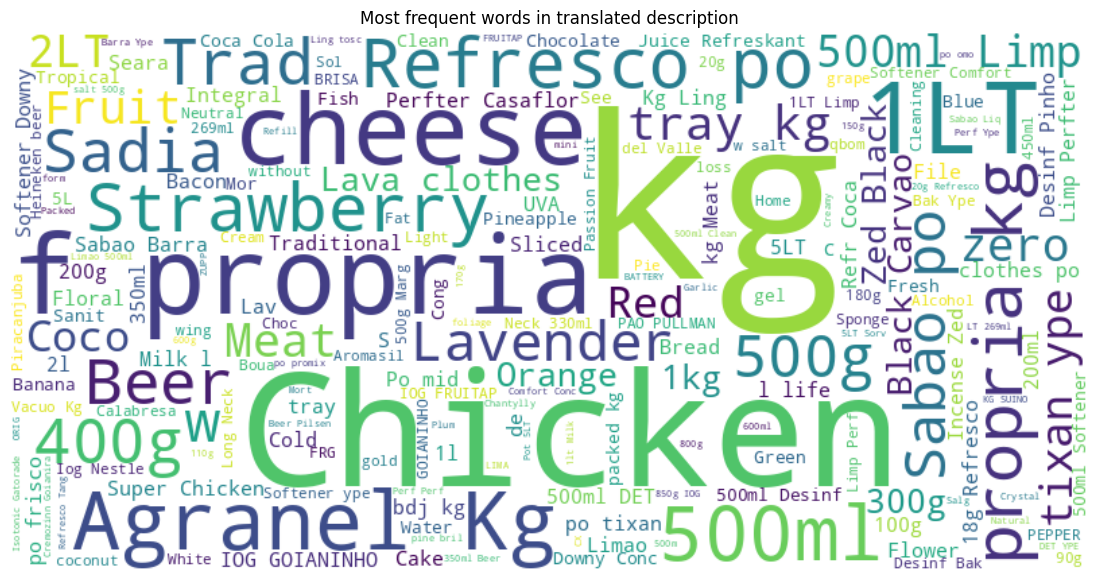

kg: 194
500ml: 163
Kg: 152
po: 83
Softener: 80
Limp: 73
KG: 70
1LT: 69
Sabao: 65
Chicken: 63
Refresco: 59
Ype: 54
IOG: 53
500g: 52
Beer: 51
350ml: 48
Baby: 48
ype: 48
Sadia: 45
400g: 42
Strawberry: 38
beer: 38
Agranel: 37
Conc: 37
Ling: 37
1kg: 36
Black: 36
chicken: 34
clothes: 33
Meat: 32
2LT: 31
Desinf: 31
Clean: 31
cheese: 29
fpropria: 29
and: 28
Perf: 28
meat: 28
Milk: 28
Lava: 28
Po: 28
Refr: 28
7: 27
Bread: 27
18g: 27
800g: 26
tray: 26
Sponge: 26
Nestle: 26
Marg: 26
15LT: 25
Tropical: 25
Red: 25
1: 25
300g: 25
Liq: 24
with: 24
YPE: 24
269ml: 24
3: 24
Lavender: 24
Zed: 24
Carvao: 24
INSET: 24
100g: 24
Perfter: 24
Casaflor: 24
Mort: 24
Juice: 24
Limao: 23
DET: 23
tixan: 23
Downy: 22
See: 22
1lt: 21
of: 21
200g: 21
Cheese: 21
FPROPRIA: 21
l: 21
20g: 21
agranel: 20
Water: 20
330ml: 20
850g: 20
GOIANINHO: 20
life: 20
Barra: 20
zero: 19
Sol: 19
DESINF: 19
Incense: 19
FRUITAP: 19
liq: 18
900ml: 18
File: 18
Sanit: 18
Iog: 18
Trad: 17
200ml: 17


In [41]:
# Identifying the most common words to check for any possible spelling mistake
!pip install wordcloud matplotlib
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.pyplot as plt

# ' '.join - Joins all the translated text entries together into one big string, separating them by spaces.
all_text = ' '.join(data['text_en'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(15,7))
# interpolation='bilinear' smooths the image when it's displayed. It makes the word cloud look cleaner and
#less pixelated (especially when resized).
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in translated description')
plt.show()

# Removing punctuation
all_text = ''.join([char for char in all_text if char not in string.punctuation])

# Spliting text into words
words = all_text.split()

# Counting the words
words_count = Counter(words)

# Defining the 100 most common
most_common_words = words_count.most_common(100)

# Displaying them
for word, count in most_common_words:
  print(f'{word}: {count}')

In [42]:
# Checking context of some specific words

# case=False: Makes the search case-insensitive, so it matches 'PECA', 'peca', 'Peca', etc
# na=False: Treats missing values (NaN) as False, ensuring they are excluded from the results and preventing potential errors during filtering
# po|Limp|Iog|Conc|Ling|Agranel|Perf|Refr|Marg|Liq|Zed|Carvao|inset|Perfter|Mort|Limao|det|see|fpropria|coco
data_filtered = data[data['text_en'].str.contains(r'\bperfter\b', case=False, na=False)]
data_filtered['text_en']

,text_en
1213,Limp Perfter Home and Perfume Mist Amore 5LT
1214,Limp Perfter Home and Perfume Sensuality 5L
1216,Limp Perfter Casaflor Coconut Water 500ml
1217,Limp Perfter CasaFlor Amore 1.75LT
1219,Limp Perfter Casaflor Amore 500ml
1220,Limp Perfter Casaflor Desire 1.75LT
1222,Limp Perfter Casaflor Desire 500ml
1223,Limp Perfter Casaflor Dreams 1.75LT
1226,Limp Perfter Casaflor Glamor 500ml
1227,Limp Perfter Casaflor Intuitive 1.75LT


In [43]:
# Changing the most common translation errors inside the table
data['text_en'] = data['text_en'].str.lower()

replacements = {
    'promocation': 'offer',
    'agranel': 'in bulk',
    'po': 'powder',
    'limp': 'Cleaner',
    'Iog': 'Yorghut',
    'conc': 'concentrated',
    'ling': 'linguiça',
    'agranel': 'in bulk',
    'perf': 'perfume',
    'refr': 'soda',
    'marg': 'margarine',
    'liq': 'liquido',
    'carvao': 'charcoal',
    'inset': 'insecticide',
    'perfter': 'perfumer',
    'mort': 'bologna',
    'limao': 'lemon',
    'det': 'detergent',
    'see': 'veja',
    'fpropria': 'store brand',
    'coco': 'coconut',
    'sabao': 'soap',
    'sin': 'unit',
    'integral1l': 'integral 1L',
    'potatinha': 'potato',
    'bread frances': 'french bread',
    'maca': 'apple',
    'arranel': 'in bulk'
}

# K= Key word and V = replacement word
# regex=True allows me to match the exact whole word using word boundaries
data['text_en'] = data['text_en'].replace(
    {r'\b' + k + r'\b': v for k, v in replacements.items()},
    regex=True
)
# obs: Without regex=True, pandas will do a literal substring replacement, meaning it won’t understand \b
# (or any other regex pattern), and it will simply replace exact string matches


# Standardizing text to title case
data['text_en'] = data['text_en'].str.title()
data.head()

,Code,Description,Amount_Sold,Unit_Price,Total_Cost,Buying,COGS,Margin%,MKP%,Total_Sale,text_en
0,024513,ABACATE AGRANEL KG,267.418,8.39,1346.60,1346.60,1346.60,40.01,66.68,2244.54,Avocado In Bulk Kg
1,025049,ABACAXI PECA,986.000,4.91,3674.41,3674.41,3674.41,24.05,31.67,4837.92,Pineapple Unit
2,072665,ABACAXI PROMOCAO PECA,9.000,0.99,31.50,31.50,31.50,-253.54,-71.71,8.91,Pineapple Offer
3,024541,ABOBORA CABOTIA AGRANEL KG,1474.745,1.66,1746.97,1746.97,1746.96,28.46,39.79,2442.07,Pumpkin Cabotia In Bulk Kg
4,063614,ABOBORA CABOTIA EMBALADO KG,502.739,2.46,601.59,601.59,601.59,51.29,105.32,1235.17,Pumpkin Cabotia Packed Kg


In [44]:
# Deleting unecessary and redundant columns
data = data.drop(columns=['Description', 'Buying', 'COGS', 'MKP%'])

#Changing text-en name
data.rename(columns={'text_en':'Description'}, inplace=True)

#Creating new columns to help understading of the data
data['Unit_Cost'] = data['Total_Cost'] / data['Amount_Sold']

# Moving a column
new_order = ['Code', 'Description', 'Unit_Cost', 'Unit_Price', 'Amount_Sold', 'Margin%', 'Total_Cost', 'Total_Sale']
data = data[new_order]
data.head()

,Code,Description,Unit_Cost,Unit_Price,Amount_Sold,Margin%,Total_Cost,Total_Sale
0,024513,Avocado In Bulk Kg,5.035562,8.39,267.418,40.01,1346.60,2244.54
1,025049,Pineapple Unit,3.726582,4.91,986.000,24.05,3674.41,4837.92
2,072665,Pineapple Offer,3.500000,0.99,9.000,-253.54,31.50,8.91
3,024541,Pumpkin Cabotia In Bulk Kg,1.184591,1.66,1474.745,28.46,1746.97,2442.07
4,063614,Pumpkin Cabotia Packed Kg,1.196625,2.46,502.739,51.29,601.59,1235.17


In [45]:
# Converting columns with more than two places after dot

# Ensure correct numeric columns
numeric_columns = data.select_dtypes(include=['float64']).columns

# Apply rounding
data[numeric_columns] = data[numeric_columns].round(2)

data.head()


,Code,Description,Unit_Cost,Unit_Price,Amount_Sold,Margin%,Total_Cost,Total_Sale
0,024513,Avocado In Bulk Kg,5.04,8.39,267.42,40.01,1346.60,2244.54
1,025049,Pineapple Unit,3.73,4.91,986.00,24.05,3674.41,4837.92
2,072665,Pineapple Offer,3.50,0.99,9.00,-253.54,31.50,8.91
3,024541,Pumpkin Cabotia In Bulk Kg,1.18,1.66,1474.74,28.46,1746.97,2442.07
4,063614,Pumpkin Cabotia Packed Kg,1.20,2.46,502.74,51.29,601.59,1235.17


In [46]:
# Filling missing values
data['Margin%'] = data['Margin%'].fillna(data['Margin%'].median())

missing_sale = data['Total_Sale'].isnull()
data.loc[missing_sale, 'Total_Sale'] = data.loc[missing_sale, 'Amount_Sold'] * data.loc[missing_sale, 'Unit_Price']

data.dropna(inplace=True)
data.isnull().sum()

,0
Code,0
Description,0
Unit_Cost,0
Unit_Price,0
Amount_Sold,0
Margin%,0
Total_Cost,0
Total_Sale,0


In [47]:
# index=False The index is not saved, only your actual data columns
data.to_csv('cleaned_data', index=False)